## Using `seaborn` for smoother data visualisation
The `seaborn` package is built on top of Matplotlib and provides a much easier way of interacting with data. In fact, its built to work with Pandas DataFrames in mind, and is capable of creating complete plots in a single line of code, as well as introducing a multitude of different plot types that Matplotlib can't create out of the box. 

But because `seaborn` is built from Matplotlib, you still have full control of the different plotting elements that you had before.

The module is imported with its traditional alias, `sns`.

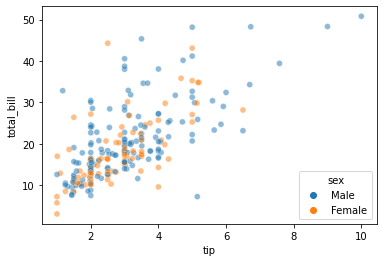

In [1]:
# Import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

# Show a simple plot with the tips data
# Note different function name to distinguish between matplotlib
tips = sns.load_dataset('tips')
graph = sns.scatterplot(data=tips, x='tip', y='total_bill', hue='sex', alpha=0.5)

Modifying the aspects of our figure is straightforward - by accessing the relevant methods and attributes. To see it again, we can use the `.figure` attribute of the variable.

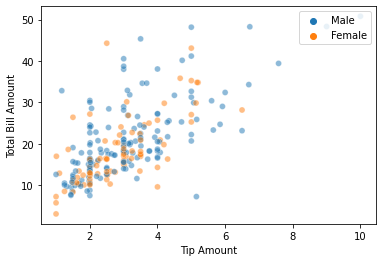

In [2]:
# Change axis labels, and legend location
graph.set_ylabel('Total Bill Amount')
graph.set_xlabel('Tip Amount')
graph.legend(loc='upper right')

# Show
graph.figure

### Data visualisation with `seaborn` - suggestions and gallery


Data visualisation is perhaps *the* most important part of conveying your results to readers. People share figures and not statistics. However, I'd argue most psychologists are **terrible** at conveying results.

It should be no surprise that different plots can produce different impressions of the data. Let's examine the `exercise` dataset that is included with `seaborn`, to demonstrate how we think about clear data visualisation. The dataset shows the heart rate of individuals on different diets under different exercises, for different time periods - typical of an ANOVA-style design in psychology.

In [3]:
# Load the dataset
exercise = sns.load_dataset('exercise')
display(exercise.head())
display(exercise.tail())

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


,Unnamed: 0,id,diet,pulse,time,kind
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running
89,89,30,no fat,150,30 min,running


<AxesSubplot:xlabel='kind', ylabel='pulse'>

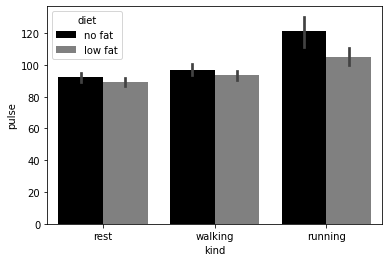

In [4]:
# Bar graph that data!
# Show off seaborn capability with categorical data
sns.barplot(data=exercise, x='kind', y='pulse', hue='diet', palette=['black', 'gray'])

/Users/alexjones/opt/anaconda3/envs/py10/lib/python3.10/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.8431372549019608, 0.0)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


<AxesSubplot:xlabel='kind', ylabel='pulse'>

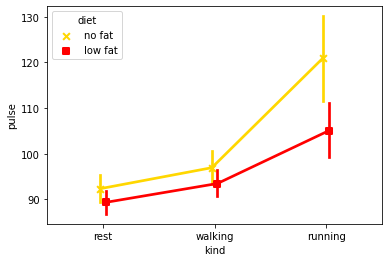

In [5]:
# Or common in psychology, the point plot - note use of HTML colour codes in palette + marker option
sns.pointplot(data=exercise, x='kind', 
              y='pulse', hue='diet', 
              markers=['x', 's'], 
              palette=['#FFD700', 'red'], 
              dodge=True)

These show an effect, but show nothing of the underlying distribution of the data. Go beyond the means and show the reader something of the distribution of your data. Seaborn has a number of graphs that are capable of this.

<AxesSubplot:xlabel='kind', ylabel='pulse'>

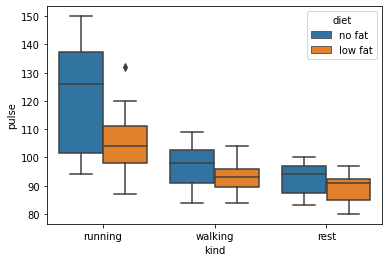

In [6]:
# Boxplot shows underlying distributions - note specifying order
sns.boxplot(data=exercise, x='kind', y='pulse', hue='diet', order=['running', 'walking', 'rest'])

<AxesSubplot:xlabel='kind', ylabel='pulse'>

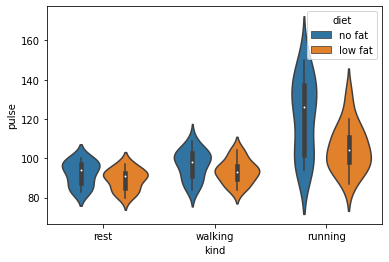

In [7]:
# A violin plot will illustrate the underlying distributions of the data using kernel density estimation - and shows some surprises!
sns.violinplot(data=exercise, x='kind', y='pulse', hue='diet')

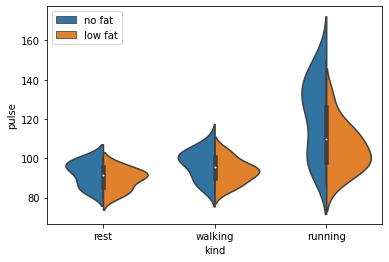

In [8]:
# Violin plots are also capable of an alternative way of visualising
ax = sns.violinplot(data=exercise, x='kind', y='pulse', hue='diet', split=True)
ax.legend(loc='upper left')

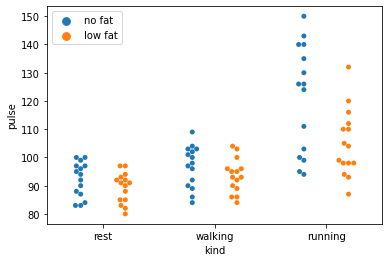

In [9]:
# Better yet, why not just plot the actual raw data with a swarm plot, that intelligently jitters points 
# to help make things clear
sns.swarmplot(data=exercise, x='kind', y='pulse', hue='diet', dodge=True).legend(loc='upper left')

<AxesSubplot:xlabel='kind', ylabel='pulse'>

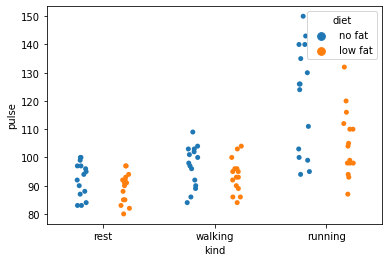

In [10]:
# Finally, a strip plot works similarly - swarmplots are better with larger datasets
sns.stripplot(data=exercise, x='kind', y='pulse', hue='diet', dodge=True)

The take home message here is that there are a number of plots that are much more informative than a simple bar or line graph. In fact, you can be as creative and as informative as you want...

<AxesSubplot:xlabel='kind', ylabel='pulse'>

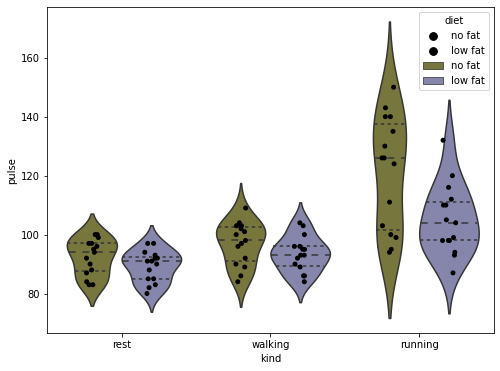

In [11]:
# Demonstrate combined plots for extra fanciness, as well as integration with matplotlib
fig, axis = plt.subplots(1, 1, figsize=(8, 6))

# put a violin on the axis we made, and set the inner content to mean and ranges
sns.stripplot(data=exercise, x='kind', y='pulse', hue='diet',
              palette=['black'], dodge=True, ax=axis)

sns.violinplot(data=exercise, x='kind', y='pulse', hue='diet', inner='quartile', 
               palette=[(.5, .5, .2), (.5, .5, .7)], ax=axis)


In [12]:
# Clean up the plot
axis.set_ylabel('Pulse')
axis.set_xlabel('Exercise Type')
axis.set_xticklabels(['Rest', 'Walking', 'Running'])

# Fix the double legend by getting the lines in the legend and the titles, and just put the first TWO back
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles[:2], labels[:2], title='Diet Type')

# Finally turn off the right and upper axis, which can be done nicely with this seaborn function
sns.despine(ax=axis)

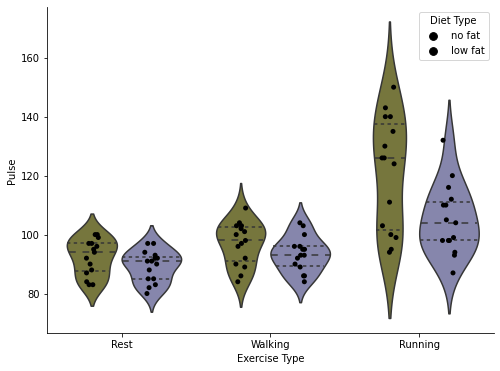

In [13]:
# Done
fig

So far we've looked at multivariable relationships, but `seaborn` has plenty of capability for plotting univariate data too, which is very helpful for examining the distribution of a variable. We can take a closer look at `pulse` variable in a few ways. 

One thing that I will introduce here is the concept of a **context manager**, which starts with the `with` keyword. Anything following the indentation has the settings applied in the context manager applied to it, and those settings are then turned off once the code executes. With plotting this is incredibly useful as it allows us to leverage different states for different plots. `seaborn` has a function, `plotting_context` that takes some string arguments that change the overall appearance of the plot - check out the help function for examples!

Hopefully the example makes things clear:

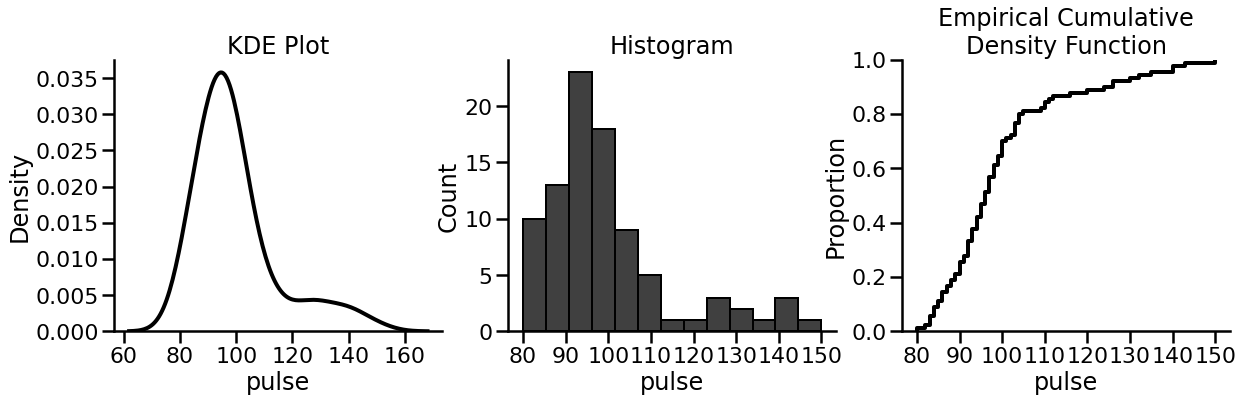

In [29]:
with sns.plotting_context('poster'): 
    
    fig, (a, b, c) = plt.subplots(1, 3, figsize=(20, 5))
    sns.despine(fig) # Removes upper/right axis bounds!
    
    # KDE plot
    sns.kdeplot(data=exercise['pulse'], ax=a, color='black', lw=4)
    a.set_title('KDE Plot')
    
    # Histogran
    sns.histplot(data=exercise['pulse'], ax=b, color='black')
    b.set_title('Histogram')
    
    # Empirical cumulative density function
    sns.ecdfplot(data=exercise['pulse'], ax=c,
                color='black', lw=4)
    c.set_title('Empirical Cumulative\nDensity Function')
    